In [1]:
# Importing the Required Libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the given uncleaned dataset into pandas dataframe
df = pd.read_csv("T1 - uncleaned_data.csv")

# Displaying the records of dataset. Bydefault "df.head()" will show us the top 5 records of the dataset
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


### Generalization

In [3]:
# Enlisting the columns/labels present in our dataset
df.columns

Index(['Index', 'Age', 'Salary', 'Rating', 'Location', 'Established',
       'Easy Apply'],
      dtype='object')

In [4]:
#df.columns = df.columns.str.lower().str.replace(" ","_")

### 1. Missing Values:
#### Question: Are there any missing values in the dataset, and if so, how should they be handled for each indicator?

In [5]:
# This will count the number of null values in our dataset
df.isnull().sum()

Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

In [6]:
# This returns a new object with the same shape as the original but with boolean values True or False for NA and NaN values
df.isna()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


- Age column of our dataset consist of 7 missing values where as the Rating column consist of 1 missing value. Thus there are total 8 missing values in our dataset.

- Removing all missing values will leave very few entries in dataset. So, filling all missing values in age column with the mean of the column

- Similarly, filling all missing values in rating column with the mean of the column

### 2. Data Types:
#### Question: What are the data types of each indicator, and do they align with their expected types (e.g., numerical, categorical)?

In [7]:
# Returns the datatype of each label
df.dtypes

Index            int64
Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object

- Salary indicator is given in range type thus it can be converted into categorical variable

- Also the Easy Apply indicator consist of boolean data, but it's of object data type.Thus we have to convert it to boolean data type.

### 3. Outliers:
#### Question: Identify potential outliers in numerical indicators (e.g., Age, Salary, Rating). Should outliers be removed or adjusted?


Index             Axes(0.125,0.786098;0.352273x0.0939024)
Age            Axes(0.547727,0.786098;0.352273x0.0939024)
Rating            Axes(0.125,0.673415;0.352273x0.0939024)
Established    Axes(0.547727,0.673415;0.352273x0.0939024)
dtype: object

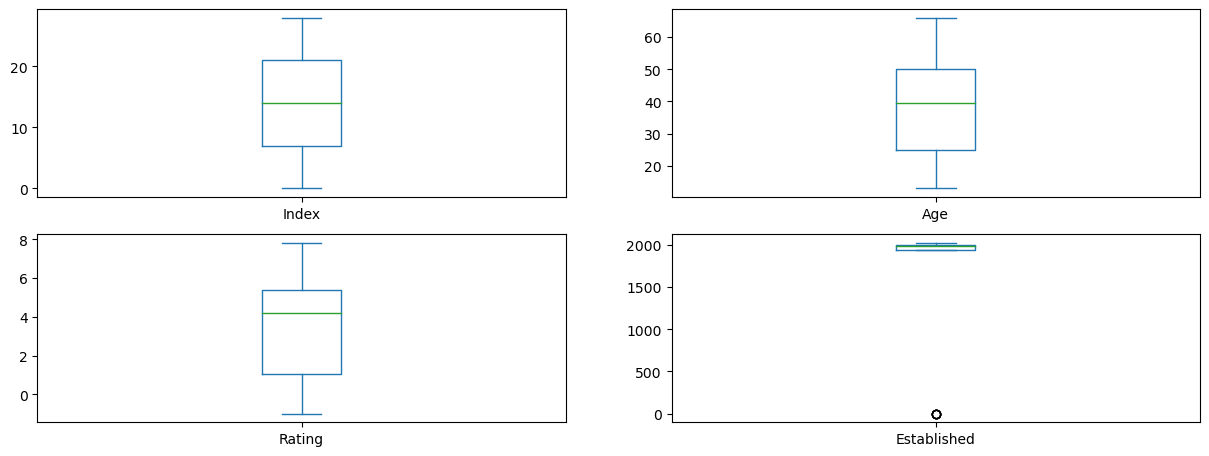

In [8]:
# Outliers can be identified with various visualization like histogram, boxplot. To do that we have to import one specific library called matplotlib
import matplotlib.pyplot as plt
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

- Outliers are the extremum (minimum or maximum) values in respective column or label

- According to the box plot that we have plot, there are no outliers in our dataset

### 4. Salary Formatting:
#### Question: Examine the format of the Salary column. Does it require any formatting or standardization for consistent analysis?


In [9]:
# formatting the salary label in our dataset
df["Salary"] = df["Salary"].str.replace("$", "").str.replace("k", "000")

In [10]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,5.4,"India,In",1999,TRUE
1,1,66.0,55000-66000,3.5,"New York,Ny",2002,TRUE
2,2,NaN,77000-89000,-1.0,"New York,Ny",-1,-1
3,3,64.0,44000-99000,4.4,India In,1988,-1
4,4,25.0,44000-99000,6.4,Australia Aus,2002,-1


- Previously Salary is given in the format like "$44k - $99k" which is very difficult to read

- Thus we have formatted the Salary label in way which is easily readable

### 5. Location Standardization:
#### Question: Check the consistency of location entries. Do they need standardization, and how can this be achieved?

### 10. Handling Special Characters:
#### Question: Examine all text-based columns (e.g., Location). Are there special characters or inconsistencies that need cleaning?

### 13. Location Accuracy:
#### Question: Assess the accuracy of location entries. Are there misspelled or ambiguous locations that require correction?

In [11]:
# This will give us the unique entries in the respective column
df["Location"].unique()

array(['India,In', 'New York,Ny', 'India In', 'Australia Aus'],
      dtype=object)

In [12]:
# Replacing ambiguous and inconsistent data with consistent and accurate data
df["Location"] = df["Location"].str.replace("India,In", "India").str.replace("New York,Ny", "New York").str.replace("India In","India").str.replace("Australia Aus","Australia")

In [13]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,5.4,India,1999,TRUE
1,1,66.0,55000-66000,3.5,New York,2002,TRUE
2,2,NaN,77000-89000,-1.0,New York,-1,-1
3,3,64.0,44000-99000,4.4,India,1988,-1
4,4,25.0,44000-99000,6.4,Australia,2002,-1


- Data present in the Location label is inconsistent and ambiguous for e.g. ['India,In', 'New York,Ny', 'India In', 'Australia Aus']

- Thus we have to format it in accurate way which will be free from ambiguity and inconsistency

### 6. Established Column:
#### Question: Explore the Established column. Are there any inconsistencies or anomalies that need to be addressed?

In [14]:
df["Established"].unique()

array([1999, 2002,   -1, 1988, 2008, 2009, 2019, 2020, 1984, 1943, 1954,
       1955, 1944, 1946, 1987, 1980, 1934, 1935, 1932], dtype=int64)

In [15]:
# Assuming -1 represent the 'year of establishment is not know', showing all -1 to Not Known
df.loc[df["Established"] == -1, "Established"] = "Unknown"

In [16]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,5.4,India,1999,TRUE
1,1,66.0,55000-66000,3.5,New York,2002,TRUE
2,2,NaN,77000-89000,-1.0,New York,Unknown,-1
3,3,64.0,44000-99000,4.4,India,1988,-1
4,4,25.0,44000-99000,6.4,Australia,2002,-1


- Assuming this column shows the year in which company was started

- For '-1' values, considering that the year of establishment is not known, Hence showing all -1 values as not known

### 7. Easy Apply Indicator:
#### Question: Analyze the Easy Apply column. Does it contain boolean values or need transformation for better analysis?

### 12. Easy Apply Transformation:
#### Question: If the Easy Apply column contains non-boolean values, how can it be transformed into a usable format?

In [17]:
# Replacing -1 values with boolean value as false. 
df["Easy Apply"] = df["Easy Apply"].str.replace("-1","FALSE")

In [18]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,5.4,India,1999,TRUE
1,1,66.0,55000-66000,3.5,New York,2002,TRUE
2,2,NaN,77000-89000,-1.0,New York,Unknown,FALSE
3,3,64.0,44000-99000,4.4,India,1988,FALSE
4,4,25.0,44000-99000,6.4,Australia,2002,FALSE


- Easy Apply indicator consist of boolean data, but it's of object data type.Thus we have to convert it to boolean data type.

- Considering "-1" represent False, replacing -1 with boolean value as FALSE

### 8. Rating Range:
#### Question: Investigate the range of values in the Rating column. Does it fall within expected rating scales, and how should outliers be treated?

### 15. Consistent Rating Scale:
#### Question: Ensure a consistent rating scale in the Rating column. Should it be normalized or adjusted for uniform analysis?

In [19]:
df["Rating"].unique()

array([ 5.4,  3.5, -1. ,  4.4,  6.4,  1.4,  0. ,  7.7,  6.7,  4. ,  3. ,
        4.5,  5.3,  3.3,  5.7,  5. ,  7.8,  2.4,  nan,  3.4])

In [20]:
# Replacing -1 and NaN values by mean value of rating. 
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
mean_Rating = df["Rating"].mean()
df["Rating"] = df["Rating"].replace(-1, mean_Rating).replace(np.nan,mean_Rating).round(decimals=0)

In [21]:
# Normalizing the rating values within certain range
df_min_max_scaled = df.copy()
df_min_max_scaled["Rating"] = (df_min_max_scaled["Rating"] - df_min_max_scaled["Rating"].min()) / (df_min_max_scaled["Rating"].max() - df_min_max_scaled["Rating"].min())

In [22]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,5.0,India,1999,TRUE
1,1,66.0,55000-66000,4.0,New York,2002,TRUE
2,2,NaN,77000-89000,4.0,New York,Unknown,FALSE
3,3,64.0,44000-99000,4.0,India,1988,FALSE
4,4,25.0,44000-99000,6.0,Australia,2002,FALSE


- Removing all missing values will leave very few entries in dataset. So, filling all missing values in rating column with the mean of the column

- Normalization helps in scaling the input features to a fixed range, thus here using min-max normalization to scale rating column within fixed range

### 9. Age Distribution:
#### Question: Check the distribution of values in the Age column. Are there any unusual entries, and how might they impact analysis?

In [23]:
df["Age"].unique()

array([44., 66., nan, 64., 25., 21., 35., 22., 55., 19., 32., 13., 52.])

In [24]:
# filling NaN/null values by mean value of ages. 
df["Age"] = df['Age'].fillna(df['Age'].mean()).round(decimals = 0)

In [25]:
# Changing the data type of age column as int
df["Age"] = df["Age"].astype(int)

In [26]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44,44000-99000,5.0,India,1999,TRUE
1,1,66,55000-66000,4.0,New York,2002,TRUE
2,2,39,77000-89000,4.0,New York,Unknown,FALSE
3,3,64,44000-99000,4.0,India,1988,FALSE
4,4,25,44000-99000,6.0,Australia,2002,FALSE


- Removing all missing values will leave very few entries in dataset. So, filling all missing values in age column with the mean of the column

- Float data type for age is inaccurate as age cannot be fractional. Thus we have changed data type of age column to int type

### 14. Handling Categorical Data:
#### Question: For categorical indicators, consider encoding or transforming them into a format suitable for analysis.

In [27]:
# Converting Salary into categorical variable 
bins = [0, 50000, 70000, np.inf]
labels = ['low', 'medium', 'high']

df["Salary"] = pd.cut(df["Salary"].str.split('-').str[0].astype(int), bins, labels=labels)

In [28]:
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44,low,5.0,India,1999,TRUE
1,1,66,medium,4.0,New York,2002,TRUE
2,2,39,high,4.0,New York,Unknown,FALSE
3,3,64,low,4.0,India,1988,FALSE
4,4,25,low,6.0,Australia,2002,FALSE


- Salary indicator is given in range type thus it can be converted into categorical variable as it is more efficient

In [29]:
# Once the data is cleaned, exporting the cleaned data so that we can check its data integrity
df.to_csv('T1 - cleaned_data.csv')

### 11. Data Integrity:
#### Question: Ensure data integrity by cross-referencing entries. For instance, does the Established column align with the Age column?

In [30]:
# Loading the cleaned data into pandas dataframe 
df_uncleaned = pd.read_csv("T1 - uncleaned_data.csv")
df_cleaned = pd.read_csv("T1 - cleaned_data.csv")

In [31]:
#df_uncleaned.head()
print(df_cleaned.head())
print(df_uncleaned.head())

   Unnamed: 0  Index  Age  Salary  Rating   Location Established  Easy Apply
0           0      0   44     low     5.0      India        1999        True
1           1      1   66  medium     4.0   New York        2002        True
2           2      2   39    high     4.0   New York     Unknown       False
3           3      3   64     low     4.0      India        1988       False
4           4      4   25     low     6.0  Australia        2002       False
   Index   Age     Salary  Rating       Location  Established Easy Apply
0      0  44.0  $44k-$99k     5.4       India,In         1999       TRUE
1      1  66.0  $55k-$66k     3.5    New York,Ny         2002       TRUE
2      2   NaN  $77k-$89k    -1.0    New York,Ny           -1         -1
3      3  64.0  $44k-$99k     4.4       India In         1988         -1
4      4  25.0  $44k-$99k     6.4  Australia Aus         2002         -1


In [32]:
df_cleaned = df_cleaned.drop ('Unnamed: 0', axis=1)

In [33]:
#Compare the shapes, columns, and data types of the DataFrames
print("Shape of uncleaned data:", df_uncleaned.shape)
print("Shape of cleaned data:", df_cleaned.shape)
print()

print("Columns of uncleaned data:", df_uncleaned.columns)
print("Columns of cleaned data:", df_cleaned.columns)
print()

print("Data types of uncleaned data:")
print(df_uncleaned.dtypes)
print()

print("Data types of cleaned data:")
print(df_cleaned.dtypes)
print()

Shape of uncleaned data: (29, 7)
Shape of cleaned data: (29, 7)

Columns of uncleaned data: Index(['Index', 'Age', 'Salary', 'Rating', 'Location', 'Established',
       'Easy Apply'],
      dtype='object')
Columns of cleaned data: Index(['Index', 'Age', 'Salary', 'Rating', 'Location', 'Established',
       'Easy Apply'],
      dtype='object')

Data types of uncleaned data:
Index            int64
Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object

Data types of cleaned data:
Index            int64
Age              int64
Salary          object
Rating         float64
Location        object
Established     object
Easy Apply        bool
dtype: object



In [34]:
# Summarize the statistics of the DataFrames
print("Summary of uncleaned data:")
print(df_uncleaned.describe())
print()

print("Summary of cleaned data:")
print(df_cleaned.describe())
print()

Summary of uncleaned data:
           Index        Age     Rating  Established
count  29.000000  22.000000  28.000000    29.000000
mean   14.000000  39.045455   3.528571  1638.620690
std     8.514693  16.134781   2.825133   762.079599
min     0.000000  13.000000  -1.000000    -1.000000
25%     7.000000  25.000000   1.050000  1935.000000
50%    14.000000  39.500000   4.200000  1984.000000
75%    21.000000  50.000000   5.400000  1999.000000
max    28.000000  66.000000   7.800000  2020.000000

Summary of cleaned data:
           Index        Age     Rating
count  29.000000  29.000000  29.000000
mean   14.000000  39.034483   4.137931
std     8.514693  13.973145   2.133477
min     0.000000  13.000000   0.000000
25%     7.000000  32.000000   3.000000
50%    14.000000  39.000000   4.000000
75%    21.000000  44.000000   5.000000
max    28.000000  66.000000   8.000000



In [35]:
# Compare the values of the DataFrames
print("Comparison of values:")
print(df_uncleaned.compare(df_cleaned))
print()

Comparison of values:
    Age            Salary         Rating             Location             \
   self other        self   other   self other           self      other   
0   NaN   NaN   $44k-$99k     low    5.4   5.0       India,In      India   
1   NaN   NaN   $55k-$66k  medium    3.5   4.0    New York,Ny   New York   
2   NaN  39.0   $77k-$89k    high   -1.0   4.0    New York,Ny   New York   
3   NaN   NaN   $44k-$99k     low    4.4   4.0       India In      India   
4   NaN   NaN   $44k-$99k     low    6.4   6.0  Australia Aus  Australia   
5   NaN   NaN   $77k-$89k    high    1.4   1.0       India,In      India   
6   NaN   NaN   $44k-$99k     low    NaN   NaN    New York,Ny   New York   
7   NaN   NaN   $44k-$99k     low   -1.0   4.0  Australia Aus  Australia   
8   NaN   NaN   $44k-$99k     low    5.4   5.0    New York,Ny   New York   
9   NaN   NaN   $44k-$99k     low    7.7   8.0       India,In      India   
10  NaN   NaN   $10k-$49k     low    5.4   5.0       India,In     

In [36]:
# Check for any missing or duplicated values in the DataFrames
print("Missing values in uncleaned data:")
print(df_uncleaned.isnull().sum())
print()

print("Missing values in cleaned data:")
print(df_cleaned.isnull().sum())
print()

print("Duplicated values in uncleaned data:")
print(df_uncleaned.duplicated().sum())
print()

print("Duplicated values in cleaned data:")
print(df_cleaned.duplicated().sum())
print()

Missing values in uncleaned data:
Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

Missing values in cleaned data:
Index          0
Age            0
Salary         0
Rating         0
Location       0
Established    0
Easy Apply     0
dtype: int64

Duplicated values in uncleaned data:
0

Duplicated values in cleaned data:
0



In [37]:
# Finally displaying cleaned data
df_cleaned   

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44,low,5.0,India,1999,True
1,1,66,medium,4.0,New York,2002,True
2,2,39,high,4.0,New York,Unknown,False
3,3,64,low,4.0,India,1988,False
4,4,25,low,6.0,Australia,2002,False
5,5,44,high,1.0,India,1999,True
6,6,21,low,0.0,New York,Unknown,False
7,7,44,low,4.0,Australia,Unknown,False
8,8,35,low,5.0,New York,Unknown,False
9,9,22,low,8.0,India,Unknown,True
